## Assignment for Week 4 - Decision Trees and Random Forest

### Task 1 - Decision Tree and Random Forest
Wine dataset: located in the assign_wk4 folder

**Objective:** predict wines quality ranking from the its chemical properties. This provide guidance to vineyards regarding quality of wine and price expected without heavy reliance on the tasters.

Predict the wine quality using decision tree. 
* What is the result? What is the accuracy of your tree model? 
* Plot and interpret the tree. Summarize your finding. 
* Predict the wine quality using random forest. 
* What is the result compared to decision tree? Conclude your findings



### Task 2 - Decison Trees and Random Forrest
German credit dataset: located in the assign_wk4 folder

**Objective:** to minimize loss from the bank’s perspective.

Bank (by loan manager) needs to decide who will get loan approval based on the applicants’ demographic and socio-economic profiles. The data set consists of 20 variables and classification on applicant whether he/she has good or bad credit risk. The predictive model will provide guidance in making loan approval decision on prospective applicants based on clients’ profiles.

From the given data set, perform the task using decision tree. 
* What are your findings?
* Plot and interpret the tree.
* Prune the tree from the previous result. 
   - Does the pruned tree show any performance improvement?  
   - What attributes are found in the pruned tree?  
* Conclude your finding.

From the given data set, perform the task using random forest. 
* Summarize your finding.

Compare results of decision tree and random forest.

### Deliverables:

Upload your notebook's .ipynb file and a pdf printout. (This assignment can be done in one or two notebooks. The choice it up to you!) 
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

    Loading required libraries for task 1 an 2.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder

import pydotplus
import collections


# plotting
import seaborn as sns
from IPython.display import Image


    Loading Wine quality dataset. 

In [3]:
wine = pd.read_csv("winequality-data.csv")

In [4]:
wine.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            6.7              0.15         0.38             1.7      0.037   
1            6.7              0.44         0.31             1.9      0.030   
2            6.1              0.17         0.21             1.9      0.090   
3            6.6              0.39         0.22             4.0      0.038   
4            6.8              0.32         0.34             6.0      0.050   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 20.0                  84.0  0.99046  3.09       0.53   
1                 41.0                 104.0  0.99000  3.29       0.62   
2                 44.0                 130.0  0.99255  3.07       0.41   
3                 17.0                  98.0  0.99018  3.25       0.53   
4                  5.0                 129.0  0.99530  3.19       0.40   

   alcohol  quality   id  
0     11.4        6  981  
1     12.6        7  982  
2      9.7        5  983  
3     13.0        7  984  
4      9.1        5  985

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         3918 non-null   float64
 1   volatile.acidity      3918 non-null   float64
 2   citric.acid           3918 non-null   float64
 3   residual.sugar        3918 non-null   float64
 4   chlorides             3918 non-null   float64
 5   free.sulfur.dioxide   3918 non-null   float64
 6   total.sulfur.dioxide  3918 non-null   float64
 7   density               3918 non-null   float64
 8   pH                    3918 non-null   float64
 9   sulphates             3918 non-null   float64
 10  alcohol               3918 non-null   float64
 11  quality               3918 non-null   int64  
 12  id                    3918 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 398.0 KB


In [6]:
wine.describe(include='all')

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    3918.000000       3918.000000  3918.000000     3918.000000   
mean        6.854620          0.278027     0.333201        6.405819   
std         0.841879          0.100459     0.121375        5.107972   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.310000        5.200000   
75%         7.300000          0.320000     0.380000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  3918.000000          3918.000000           3918.000000  3918.000000   
mean      0.045566            35.326187            138.395227     0.994026   
std       0.021138            17.158043             42.996820     0.003025   
min       0.009000             3.000000              9.000000     0.987110   
25%       0.036000            23.000000            107.250000     0.991700   
50%       0.043000            34.000000            134.000000     0.993730   
75%       0.050000            46.000000            168.000000     0.996160   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality           id  
count  3918.000000  3918.000000  3918.000000  3918.000000  3918.000000  
mean      3.187989     0.489704    10.518765     5.877489  2939.500000  
std       0.150022     0.114186     1.237195     0.890364  1131.173506  
min       2.740000     0.220000     8.000000     3.000000   981.000000  
25%       3.090000     0.410000     9.500000     5.000000  1960.250000  
50%       3.180000     0.470000    10.400000     6.000000  2939.500000  
75%       3.280000     0.550000    11.400000     6.000000  3918.750000  
max       3.800000     1.080000    14.200000     9.000000  4898.000000

    We drop ID column because it's not useful and it would mess the model up.

In [7]:
wine.drop(['id'],axis=1, inplace=True)

<AxesSubplot:>

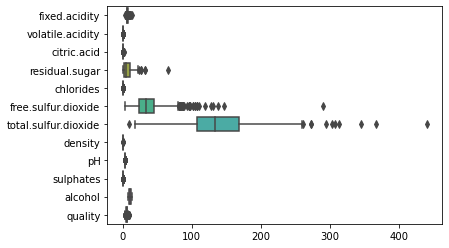

In [8]:
sns.boxplot(data=wine, orient='h')

    Wine dataset has fair amount of outiers. However, DT and RF models do not assume the data is distributed normally. So, we will not deal with the outliers.

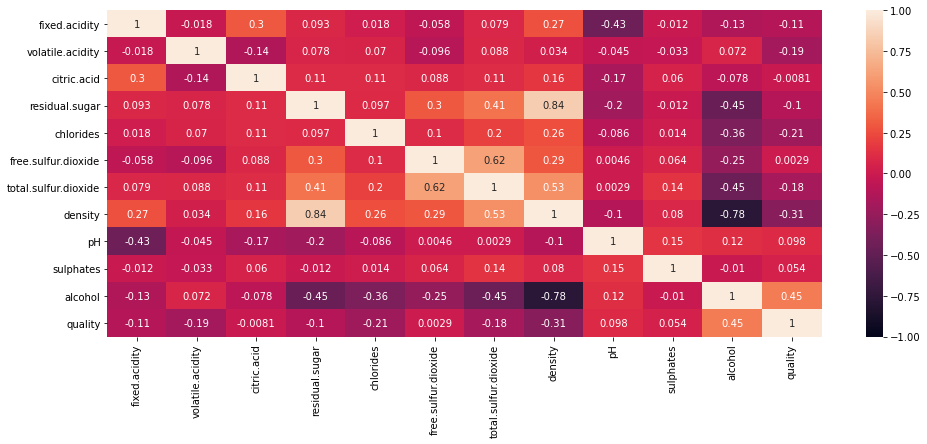

In [9]:
plt.figure(figsize=(16, 6))
_ = sns.heatmap(wine.corr(), vmin=-1, vmax=1, annot=True)

    Here we split the data to test and train subsets with ratio 80:20

In [10]:
#gather up names of all the columns
cols = wine.columns

#set the prediction column and the feature columns for KNN
prediction_col = 'quality'
feature_cols = [c for c in cols if c != prediction_col]

x = wine[feature_cols].values
y = wine[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

    Now we fit DT model 

In [11]:
# fitting dt model 
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

#gathering the predictions
preds = tree_model.predict(x_test)

In [12]:
#display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[6 6 5 6 6 6 3 5 6 5 5 6 6 5 5 6 5 6 6 8 6 8 5 5 5 3 7 6 5 5 5 5 6 7 4 6 5
 6 5 5 7 4 6 6 4 5 5 6 4 6 5 5 5 5 5 4 6 5 6 6 7 6 7 5 6 7 6 6 6 7 5 5 5 6
 6 6 5 6 6 8 6 6 5 5 7 5 5 6 5 7 6 5 6 6 6 5 6 6 5 6 5 7 7 4 7 6 6 6 5 6 7
 5 6 4 7 7 7 4 6 5 6 7 5 5 6 5 5 6 4 5 7 6 5 5 6 6 5 6 6 6 5 8 6 6 5 6 6 6
 5 6 8 6 5 5 5 6 6 6 6 6 5 7 5 6 5 6 4 7 6 8 8 6 6 5 8 6 5 5 6 6 7 6 5 6 5
 7 6 7 7 5 5 6 6 6 6 8 4 6 6 5 7 7 5 6 6 6 6 5 7 5 5 5 6 6 7 6 6 6 5 5 8 5
 7 5 5 5 6 7 7 5 8 6 6 5 6 6 7 6 5 6 6 6 6 6 7 5 7 5 6 5 6 5 6 6 6 6 5 5 6
 7 6 5 5 5 7 5 6 6 5 5 8 5 4 5 7 6 7 5 5 6 5 5 6 7 5 7 7 6 4 7 6 6 6 7 6 6
 5 6 5 6 6 7 5 5 5 4 6 5 7 5 6 7 5 6 6 6 7 7 5 6 5 7 6 6 6 7 5 5 7 6 5 4 6
 7 5 5 5 5 4 5 6 6 5 7 7 6 5 6 5 6 7 6 5 5 6 5 4 6 5 5 6 6 6 6 7 6 3 6 8 6
 6 6 5 6 6 5 7 8 6 6 8 6 6 5 5 5 5 6 7 6 7 6 6 6 5 7 5 6 7 5 7 7 8 6 5 6 5
 5 6 5 5 6 6 5 6 5 5 7 8 6 6 6 5 6 6 5 5 5 6 7 7 6 6 6 8 7 5 6 5 6 5 6 8 6
 5 6 7 6 6 6 6 6 6 5 6 5 5 8 6 6 6 6 6 8 5 5 6 7 6 8 7 7 7 6 5 5 6 4 4 6 6

    Above is a display of actual data and the predection

6    335
5    256
7    125
8     36
4     26
3      6
dtype: int64


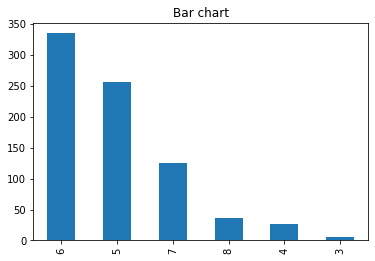

In [13]:
test_by_quality=pd.value_counts(y_test, sort= True)
test_by_quality.plot(kind= 'bar')
plt.title('Bar chart')

print(test_by_quality)

6    346
5    232
7    150
8     27
4     26
3      2
9      1
dtype: int64


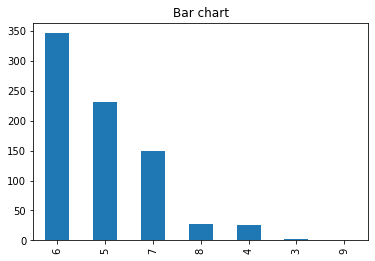

In [14]:
preds_by_quality=pd.value_counts(preds, sort= True)
preds_by_quality.plot(kind= 'bar')
plt.title('Bar chart')

print(preds_by_quality)

    The two bar charts above shows the test and the predection data, they look the same except for 9, 8, and 4 quality score.

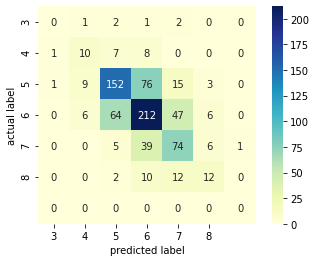

In [15]:
# make a confusion matrix to display the results
cm = confusion_matrix(y_test, preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

    Confusion matrix above shows the true positive for 5 is 147 and for 6 is 206.

In [16]:
print(accuracy_score(y_test,preds))

0.5867346938775511


    The model accuracy score is 58% which is bad. 

In [17]:
# display the importance features

importance_list = list(zip(feature_cols,tree_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
sorted_import_feature


[('alcohol', 0.127836270789399),
 ('total.sulfur.dioxide', 0.10415198288802736),
 ('volatile.acidity', 0.09964240177881391),
 ('density', 0.09797679871762997),
 ('pH', 0.09594878679480359),
 ('citric.acid', 0.08841728712041991),
 ('free.sulfur.dioxide', 0.0834359735931526),
 ('sulphates', 0.0832296623472417),
 ('residual.sugar', 0.07963444247835438),
 ('chlorides', 0.07575298916689059),
 ('fixed.acidity', 0.06397340432526709)]

    Above is importance list of feature columns. all features importance are between 6% to 12%. 

In [18]:
# plotting the dt
dot_data = tree.export_graphviz(tree_model,
                                feature_names=feature_cols,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('decisiontree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.455838 to fit



True

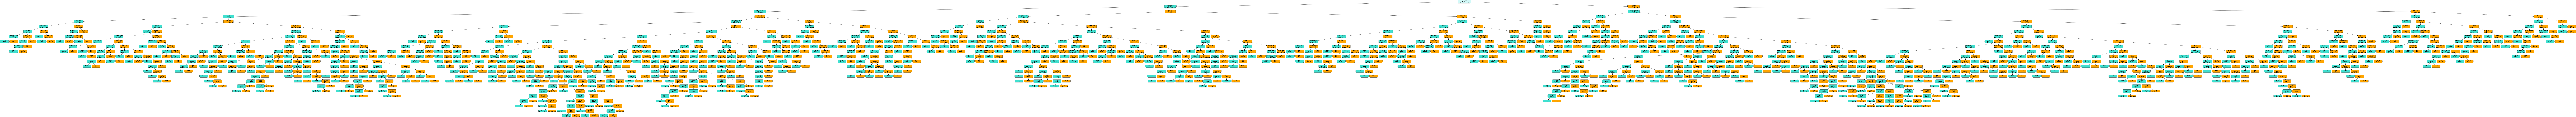

In [19]:
#display the png here
Image(filename='decisiontree.png') 

    Above is a plot of DT model.

In [20]:
import random
from random import randint
value = np.random.randint(100, size=3918)
#1 and 10 represent the range for your random value
print(value)

[83 94 74 ...  5 57 24]


In [21]:
wine.assign(value = np.random.randint(100, size=3918))

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0               6.7              0.15         0.38            1.70      0.037   
1               6.7              0.44         0.31            1.90      0.030   
2               6.1              0.17         0.21            1.90      0.090   
3               6.6              0.39         0.22            4.00      0.038   
4               6.8              0.32         0.34            6.00      0.050   
...             ...               ...          ...             ...        ...   
3913            6.5              0.28         0.38            7.80      0.031   
3914            6.6              0.21         0.29            5.35      0.029   
3915            8.6              0.18         0.28            0.80      0.032   
3916            6.4              0.22         0.38            9.10      0.044   
3917            7.2              0.46         0.65           10.40      0.050   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                    20.0                  84.0  0.99046  3.09       0.53   
1                    41.0                 104.0  0.99000  3.29       0.62   
2                    44.0                 130.0  0.99255  3.07       0.41   
3                    17.0                  98.0  0.99018  3.25       0.53   
4                     5.0                 129.0  0.99530  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
3913                 54.0                 216.0  0.99154  3.03       0.42   
3914                 43.0                 106.0  0.99112  2.93       0.43   
3915                 25.0                  78.0  0.99104  2.99       0.38   
3916                 35.0                 127.0  0.99326  2.97       0.30   
3917                 76.0                 192.0  0.99760  3.16       0.42   

      alcohol  quality  value  
0        11.4        6     33  
1        12.6        7     43  
2         9.7        5     17  
3        13.0        7      8  
4         9.1        5      7  
...       ...      ...    ...  
3913     13.1        6     83  
3914     11.5        7     30  
3915     11.1        5     11  
3916     11.0        7     73  
3917      8.7        5     55  

[3918 rows x 13 columns]

In [22]:
wine1= wine.assign(value = np.random.randint(100, size=3918))

In [23]:
wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         3918 non-null   float64
 1   volatile.acidity      3918 non-null   float64
 2   citric.acid           3918 non-null   float64
 3   residual.sugar        3918 non-null   float64
 4   chlorides             3918 non-null   float64
 5   free.sulfur.dioxide   3918 non-null   float64
 6   total.sulfur.dioxide  3918 non-null   float64
 7   density               3918 non-null   float64
 8   pH                    3918 non-null   float64
 9   sulphates             3918 non-null   float64
 10  alcohol               3918 non-null   float64
 11  quality               3918 non-null   int64  
 12  value                 3918 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 382.7 KB


    One of feature engineering methods is to put a random column in the data so that we can see which feature is actually influaces the model. 

In [24]:

#gather up names of all the columns
cols = wine1.columns
print(cols)

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'value'],
      dtype='object')


    Now we fit the RF model with random value column. 

In [25]:

#set the prediction column and the feature columns for KNN
prediction_col = 'quality'
feature_cols = [c for c in cols if c != prediction_col]

x = wine1[feature_cols].values
y = wine1[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_jobs = -1, random_state=41)
forest_model.fit(x_train,y_train)

#gathering the predictions
forest_preds = forest_model.predict(x_test)

In [30]:
#display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(forest_preds)

Actuals for test data set
[6 6 5 6 6 6 3 5 6 5 5 6 6 5 5 6 5 6 6 8 6 8 5 5 5 3 7 6 5 5 5 5 6 7 4 6 5
 6 5 5 7 4 6 6 4 5 5 6 4 6 5 5 5 5 5 4 6 5 6 6 7 6 7 5 6 7 6 6 6 7 5 5 5 6
 6 6 5 6 6 8 6 6 5 5 7 5 5 6 5 7 6 5 6 6 6 5 6 6 5 6 5 7 7 4 7 6 6 6 5 6 7
 5 6 4 7 7 7 4 6 5 6 7 5 5 6 5 5 6 4 5 7 6 5 5 6 6 5 6 6 6 5 8 6 6 5 6 6 6
 5 6 8 6 5 5 5 6 6 6 6 6 5 7 5 6 5 6 4 7 6 8 8 6 6 5 8 6 5 5 6 6 7 6 5 6 5
 7 6 7 7 5 5 6 6 6 6 8 4 6 6 5 7 7 5 6 6 6 6 5 7 5 5 5 6 6 7 6 6 6 5 5 8 5
 7 5 5 5 6 7 7 5 8 6 6 5 6 6 7 6 5 6 6 6 6 6 7 5 7 5 6 5 6 5 6 6 6 6 5 5 6
 7 6 5 5 5 7 5 6 6 5 5 8 5 4 5 7 6 7 5 5 6 5 5 6 7 5 7 7 6 4 7 6 6 6 7 6 6
 5 6 5 6 6 7 5 5 5 4 6 5 7 5 6 7 5 6 6 6 7 7 5 6 5 7 6 6 6 7 5 5 7 6 5 4 6
 7 5 5 5 5 4 5 6 6 5 7 7 6 5 6 5 6 7 6 5 5 6 5 4 6 5 5 6 6 6 6 7 6 3 6 8 6
 6 6 5 6 6 5 7 8 6 6 8 6 6 5 5 5 5 6 7 6 7 6 6 6 5 7 5 6 7 5 7 7 8 6 5 6 5
 5 6 5 5 6 6 5 6 5 5 7 8 6 6 6 5 6 6 5 5 5 6 7 7 6 6 6 8 7 5 6 5 6 5 6 8 6
 5 6 7 6 6 6 6 6 6 5 6 5 5 8 6 6 6 6 6 8 5 5 6 7 6 8 7 7 7 6 5 5 6 4 4 6 6

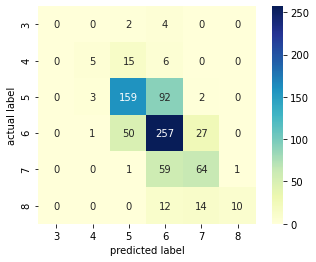

In [31]:
# make a confusion matrix to display the results
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, forest_preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

In [32]:
#using the sklearn.metrics package to determine the accuracy of the model
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,forest_preds))

0.6313775510204082


    The accuracy score is 63% which is better than DT model but still it doesn't perform well.

In [33]:
# display the importance features with our tree

importance_list = list(zip(feature_cols,forest_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
sorted_import_feature

[('alcohol', 0.11257259894394057),
 ('density', 0.09605635045856493),
 ('volatile.acidity', 0.09307815006272258),
 ('total.sulfur.dioxide', 0.08773617479118133),
 ('free.sulfur.dioxide', 0.08668346050572774),
 ('chlorides', 0.08103012000842971),
 ('residual.sugar', 0.08017495324399306),
 ('pH', 0.0782000937567712),
 ('sulphates', 0.07489168659928121),
 ('citric.acid', 0.07478781387451643),
 ('fixed.acidity', 0.06966984124898189),
 ('value', 0.06511875650588936)]

In [34]:
max_feature_len = len(max(feature_cols, key=len))

In [35]:
for feature, rank in sorted_import_feature:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank*100:.2f}%')

alcohol: ............. 11.26%
density: ............. 9.61%
volatile.acidity: .... 9.31%
total.sulfur.dioxide:  8.77%
free.sulfur.dioxide: . 8.67%
chlorides: ........... 8.10%
residual.sugar: ...... 8.02%
pH: .................. 7.82%
sulphates: ........... 7.49%
citric.acid: ......... 7.48%
fixed.acidity: ....... 6.97%
value: ............... 6.51%


    From the list above, seems that every feature is influencing the model. So, the random value is no longer needed

In [36]:
wine1.drop(['value'],axis=1, inplace=True)

In [37]:
cols = wine1.columns

In [38]:
#set the prediction column and the feature columns for KNN
prediction_col = 'quality'
feature_cols = [c for c in cols if c != prediction_col]

x = wine1[feature_cols].values
y = wine1[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_jobs = -1, random_state=41)
forest_model.fit(x_train,y_train)

#gathering the predictions
forest_preds = forest_model.predict(x_test)

In [40]:
#using the sklearn.metrics package to determine the accuracy of the model
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,forest_preds))

0.6441326530612245


    The model perform better without the randon value by 1%.

In [41]:
from sklearn.tree import export_graphviz

estimator= forest_model.estimators_[50] #extract one tree to test
features = cols[:-1]

In [42]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [43]:
# Convert to png using system command
from subprocess import call
call (['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

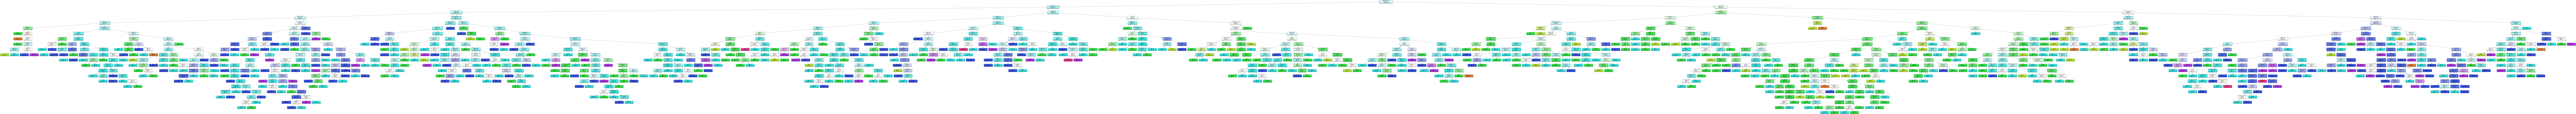

In [44]:
# Display in notebook
from IPython.display import Image
Image(filename='tree.png')

    Above is RF tree.

    Another way to improve the model performance is to minimize the target levels. In this case we have 7 levels. so, I will make it 4 levels by combining 2 levels as one.

In [45]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         3918 non-null   float64
 1   volatile.acidity      3918 non-null   float64
 2   citric.acid           3918 non-null   float64
 3   residual.sugar        3918 non-null   float64
 4   chlorides             3918 non-null   float64
 5   free.sulfur.dioxide   3918 non-null   float64
 6   total.sulfur.dioxide  3918 non-null   float64
 7   density               3918 non-null   float64
 8   pH                    3918 non-null   float64
 9   sulphates             3918 non-null   float64
 10  alcohol               3918 non-null   float64
 11  quality               3918 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 367.4 KB


In [46]:
wine['quality'].unique()

array([6, 7, 5, 8, 4, 3, 9], dtype=int64)

In [47]:
wine['quality'] = wine['quality'].replace({3: 1, 4: 1, 5:2, 6:2, 7:3, 8:4, 9:4})


In [48]:
wine['quality'].unique()

array([2, 3, 4, 1], dtype=int64)

In [49]:
#gather up names of all the columns
cols = wine.columns

#set the prediction column and the feature columns for KNN
prediction_col = 'quality'
feature_cols = [c for c in cols if c != prediction_col]

x = wine[feature_cols].values
y = wine[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [50]:
# establish and fit the model using DecisonTree()
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

#gathering the predictions
preds = tree_model.predict(x_test)

In [51]:
#using the sklearn.metrics package to determine the accuracy of the model
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,preds))

0.7512755102040817


    Minimizing the target levels did improve the model from 63% to 75%.

    Task 2
    
    In task 2, we going to use german cridet risk dataset to predict cost matrix for people who want to get a loan. 

In [52]:
bank = pd.read_csv("german_credit_risk.csv")

In [53]:
bank.head()

Checking.Account  Duration Credit.Hist Purpose  Credit.Amount  \
0              A11         6         A34     A43           1169   
1              A12        48         A32     A43           5951   
2              A14        12         A34     A46           2096   
3              A11        42         A32     A42           7882   
4              A11        24         A33     A40           4870   

  Saving.Account Employmnet  Disposable.Income Personal.Status Other.Debtors  \
0            A65        A75                  4             A93          A101   
1            A61        A73                  2             A92          A101   
2            A61        A74                  2             A93          A101   
3            A61        A74                  2             A93          A103   
4            A61        A73                  3             A93          A101   

   ...  Property Age  Other.Loans Housing Existing.Credits   Job  \
0  ...      A121  67         A143    A152                2  A173   
1  ...      A121  22         A143    A152                1  A173   
2  ...      A121  49         A143    A152                1  A172   
3  ...      A122  45         A143    A153                1  A173   
4  ...      A124  53         A143    A153                2  A173   

  Number.Liable  Telephone Foreign.Worker Cost.Matrix  
0             1       A192           A201           1  
1             1       A191           A201           2  
2             2       A191           A201           1  
3             2       A191           A201           1  
4             2       A191           A201           2  

[5 rows x 21 columns]

In [54]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Checking.Account   1000 non-null   object
 1   Duration           1000 non-null   int64 
 2   Credit.Hist        1000 non-null   object
 3   Purpose            1000 non-null   object
 4   Credit.Amount      1000 non-null   int64 
 5   Saving.Account     1000 non-null   object
 6   Employmnet         1000 non-null   object
 7   Disposable.Income  1000 non-null   int64 
 8   Personal.Status    1000 non-null   object
 9   Other.Debtors      1000 non-null   object
 10  Present.Residence  1000 non-null   int64 
 11  Property           1000 non-null   object
 12  Age                1000 non-null   int64 
 13  Other.Loans        1000 non-null   object
 14  Housing            1000 non-null   object
 15  Existing.Credits   1000 non-null   int64 
 16  Job                1000 non-null   object
 

    In order to fit the model, we need to convert all categorical variables to numeric. Meaning that instead of storing factor variables as object, we label them with numbers. 

In [55]:
# convert object to int 

#checking account column (checking account status)
# A11 < 0 dm  so I convert it t -1
# A12 =< 0 < 200 I convert it to 0
# A13 < 200  I convert it to 1
# A14 no checking account - I convert it to -9

bank['Checking.Account'] = bank['Checking.Account'].replace({'A11': 1, 'A12': 2, 'A13': 3, 'A14': 0})

# Credit history column 

# A30 : no credits taken/ all credits paid back duly
# A31 : all credits at this bank paid back duly
# A32 : existing credits paid back duly till now
# A33 : delay in paying off in the past
# A34 : critical account/ other credits existing (not at this bank)

bank['Credit.Hist'] = bank['Credit.Hist'].replace({'A30': 4,'A31': 3,'A32': 2,'A33': 1,'A34':0})

# Purpose column (purpose of the loan)

# A40 : car (new)
# A41 : car (used)
# A42 : furniture/equipment
# A43 : radio/television
# A44 : domestic appliances
# A45 : repairs
# A46 : education
# A47 : (vacation - does not exist?)
# A48 : retraining
# A49 : business
# A410 : others

bank['Purpose'] = bank['Purpose'].replace({'A40': 1, 'A41':2,'A42':3, 'A43':4,'A44':5,'A45':6, 'A46':7, 'A47':8,'A48':9,'A49':10,'A410':11})

# Saving Account column

# A61 :          ... <  100 DM
# A62 :   100 <= ... <  500 DM
# A63 :   500 <= ... < 1000 DM  
# A64 :          .. >= 1000 DM
# A65 :   unknown/ no savings account

bank['Saving.Account'] = bank['Saving.Account'].replace({'A61':1 ,'A62':2 ,'A63':3 ,'A64':4 ,'A65': 0})

# Employmnet column

# A71 : unemployed
# A72 :       ... < 1 year
# A73 : 1  <= ... < 4 years  
# A74 : 4  <= ... < 7 years
# A75 :       .. >= 7 years

bank['Employmnet'] = bank['Employmnet'].replace({'A71': 0, 'A72':1, 'A73': 2, 'A74':3, 'A75': 4})

# Personal.Status column

# A91 : male   : divorced/separated
# A92 : female : divorced/separated/married
# A93 : male   : single
# A94 : male   : married/widowed
# A95 : female : single


bank['Personal.Status'] = bank['Personal.Status'].replace({'A91': 1,'A92': 2,'A93': 3,'A94': 4,'A95':5 })
                
                
                
                
# Other.Debtors column

# A101 : none
# A102 : co-applicant
# A103 : guarantor

bank['Other.Debtors'] = bank['Other.Debtors'].replace({'A101': 1, 'A102': 2,'A103':3})

# Property column


# A121 : real estate
# A122 : if not A121 : building society savings agreement/
# life insurance
    # A123 : if not A121/A122 : car or other, not in attribute 6
    # A124 : unknown / no property

bank['Property'] = bank['Property'].replace({'A121': 1, 'A122':2, 'A123':3,'A124':4})
    
# Other.Loans column 

# A141 : bank
# A142 : stores
# A143 : none

bank['Other.Loans'] = bank['Other.Loans'].replace({'A141':1,'A142':2,'A143':0})

# Housing column

# A151 : rent
# A152 : own
# A153 : for free

bank['Housing'] = bank['Housing'].replace({'A151':1,'A152':2,'A153':3})

# Job column

# A171 : unemployed/ unskilled  - non-resident
# A172 : unskilled - resident
# A173 : skilled employee / official
# A174 : management/ self-employed/ highly qualified employee/ officer

bank['Job'] = bank['Job'].replace({'A171': 1,'A172':2 , 'A173':3,'A174':4})

# Telephone column

# A191 : none
# A192 : yes, registered under the customers name

bank['Telephone'] = bank['Telephone'].replace({'A191':0, 'A192':1})

# Foreign.Worker column

# A201 : yes
# A202 : no

bank['Foreign.Worker'] = bank['Foreign.Worker'].replace({'A201':0,'A202':1})

In [56]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Checking.Account   1000 non-null   int64
 1   Duration           1000 non-null   int64
 2   Credit.Hist        1000 non-null   int64
 3   Purpose            1000 non-null   int64
 4   Credit.Amount      1000 non-null   int64
 5   Saving.Account     1000 non-null   int64
 6   Employmnet         1000 non-null   int64
 7   Disposable.Income  1000 non-null   int64
 8   Personal.Status    1000 non-null   int64
 9   Other.Debtors      1000 non-null   int64
 10  Present.Residence  1000 non-null   int64
 11  Property           1000 non-null   int64
 12  Age                1000 non-null   int64
 13  Other.Loans        1000 non-null   int64
 14  Housing            1000 non-null   int64
 15  Existing.Credits   1000 non-null   int64
 16  Job                1000 non-null   int64
 17  Number.Liable  

In [57]:
bank.isna().sum()

Checking.Account     0
Duration             0
Credit.Hist          0
Purpose              0
Credit.Amount        0
Saving.Account       0
Employmnet           0
Disposable.Income    0
Personal.Status      0
Other.Debtors        0
Present.Residence    0
Property             0
Age                  0
Other.Loans          0
Housing              0
Existing.Credits     0
Job                  0
Number.Liable        0
Telephone            0
Foreign.Worker       0
Cost.Matrix          0
dtype: int64

In [58]:
bank.describe(include='all')

Checking.Account     Duration  Credit.Hist      Purpose  Credit.Amount  \
count       1000.000000  1000.000000   1000.00000  1000.000000    1000.000000   
mean           1.001000    20.903000      1.45500     3.828000    3271.258000   
std            0.957034    12.058814      1.08312     2.744439    2822.736876   
min            0.000000     4.000000      0.00000     1.000000     250.000000   
25%            0.000000    12.000000      0.00000     2.000000    1365.500000   
50%            1.000000    18.000000      2.00000     3.000000    2319.500000   
75%            2.000000    24.000000      2.00000     4.000000    3972.250000   
max            3.000000    72.000000      4.00000    11.000000   18424.000000   

       Saving.Account   Employmnet  Disposable.Income  Personal.Status  \
count     1000.000000  1000.000000        1000.000000       1000.00000   
mean         1.190000     2.384000           2.973000          2.68200   
std          0.966869     1.208306           1.118715          0.70808   
min          0.000000     0.000000           1.000000          1.00000   
25%          1.000000     2.000000           2.000000          2.00000   
50%          1.000000     2.000000           3.000000          3.00000   
75%          1.000000     4.000000           4.000000          3.00000   
max          4.000000     4.000000           4.000000          4.00000   

       Other.Debtors  ...     Property          Age  Other.Loans      Housing  \
count    1000.000000  ...  1000.000000  1000.000000  1000.000000  1000.000000   
mean        1.145000  ...     2.358000    35.546000     0.233000     1.929000   
std         0.477706  ...     1.050209    11.375469     0.522479     0.531264   
min         1.000000  ...     1.000000    19.000000     0.000000     1.000000   
25%         1.000000  ...     1.000000    27.000000     0.000000     2.000000   
50%         1.000000  ...     2.000000    33.000000     0.000000     2.000000   
75%         1.000000  ...     3.000000    42.000000     0.000000     2.000000   
max         3.000000  ...     4.000000    75.000000     2.000000     3.000000   

       Existing.Credits          Job  Number.Liable    Telephone  \
count       1000.000000  1000.000000    1000.000000  1000.000000   
mean           1.407000     2.904000       1.155000     0.404000   
std            0.577654     0.653614       0.362086     0.490943   
min            1.000000     1.000000       1.000000     0.000000   
25%            1.000000     3.000000       1.000000     0.000000   
50%            1.000000     3.000000       1.000000     0.000000   
75%            2.000000     3.000000       1.000000     1.000000   
max            4.000000     4.000000       2.000000     1.000000   

       Foreign.Worker  Cost.Matrix  
count     1000.000000  1000.000000  
mean         0.037000     1.300000  
std          0.188856     0.458487  
min          0.000000     1.000000  
25%          0.000000     1.000000  
50%          0.000000     1.000000  
75%          0.000000     2.000000  
max          1.000000     2.000000  

[8 rows x 21 columns]

    All data is numeric and without any missing values, now we can fit the model.

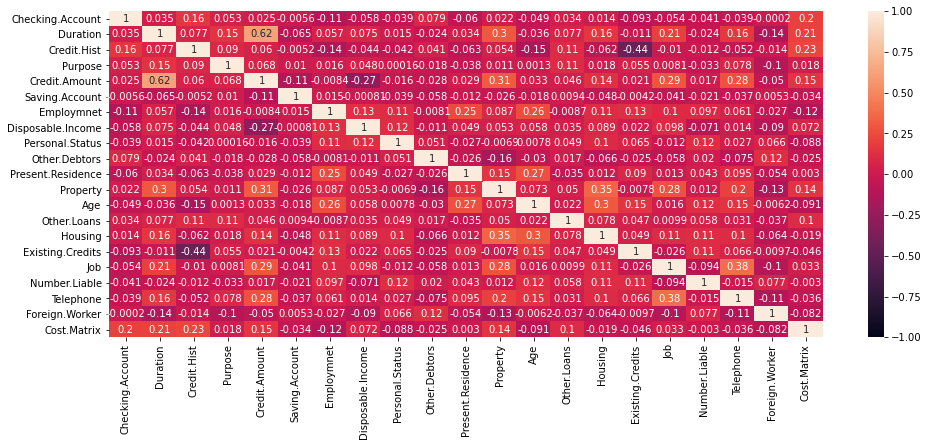

In [59]:
plt.figure(figsize=(16, 6))
_ = sns.heatmap(bank.corr(), vmin=-1, vmax=1, annot=True)

    Splitting the data and fitting desecion tree model 

In [60]:
#gather up names of all the columns
cols = bank.columns

#set the prediction column and the feature columns for KNN
prediction_col = 'Cost.Matrix'
feature_cols = [c for c in cols if c != prediction_col]

x = bank[feature_cols].values
y = bank[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [61]:

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

#gathering the predictions
preds = tree_model.predict(x_test)

In [62]:
#display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[1 2 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 1 1 1 2 1 2 1
 1 1 1 2 1 1 2 1 2 1 1 2 1 2 1 1 2 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1 2 2 1 2 1
 1 1 2 1 2 2 1 1 1 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 2 2 1 1 2 1 1 2 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 2 2 1 2 1 2 1
 2 2 1 2 1 2 1 1 1 2 2 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 1 2
 1 1 2 1 2 2 1 1 1 1 2 2 1 2 1]
Predictions for test data set
[1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 2 2 1 1 1 1 2 1 1 1
 1 2 1 1 2 2 1 2 2 1 1 2 2 2 1 1 1 2 2 2 2 1 2 1 2 1 2 1 2 1 1 2 1 1 1 1 1
 1 1 1 1 1 2 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 2 1 2 1 1 2 2 1 1 2 1
 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 1
 1 1 1 1 2 2 1 1 1 2 1 2 1 1 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 2 2 2 1 1 1 1 2 1 2 1]


1    131
2     69
dtype: int64


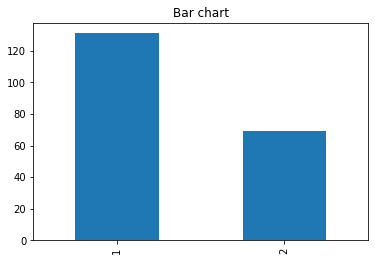

In [63]:
test_by_quality=pd.value_counts(y_test, sort= True)
test_by_quality.plot(kind= 'bar')
plt.title('Bar chart')

print(test_by_quality)

1    133
2     67
dtype: int64


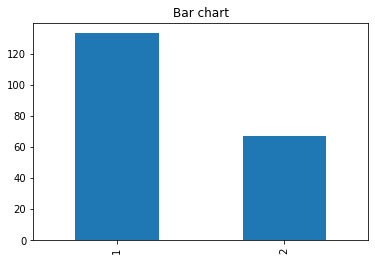

In [64]:
preds_by_quality=pd.value_counts(preds, sort= True)
preds_by_quality.plot(kind= 'bar')
plt.title('Bar chart')

print(preds_by_quality)

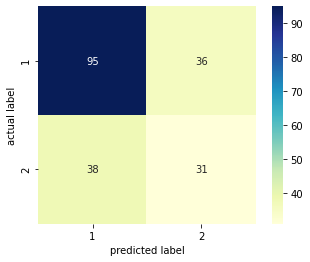

In [65]:
# make a confusion matrix to display the results


cm = confusion_matrix(y_test, preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

In [65]:
print(accuracy_score(y_test,preds))

0.635


    DT model accuracy is 63% which is not that good. 

    Now Random Forest model 

In [66]:

forest_model = RandomForestClassifier(n_jobs = -1, random_state=41)
forest_model.fit(x_train,y_train)

#gathering the predictions
forest_preds = forest_model.predict(x_test)

In [67]:
print(accuracy_score(y_test,preds))

0.63


    RF model accuracy is the same as DT model. I will assign random value column to see which column to drop from the model.

In [68]:
bank.assign(value = np.random.randint(10, size=1000))

Checking.Account  Duration  Credit.Hist  Purpose  Credit.Amount  \
0                   1         6            0        4           1169   
1                   2        48            2        4           5951   
2                   0        12            0        7           2096   
3                   1        42            2        3           7882   
4                   1        24            1        1           4870   
..                ...       ...          ...      ...            ...   
995                 0        12            2        3           1736   
996                 1        30            2        2           3857   
997                 0        12            2        4            804   
998                 1        45            2        4           1845   
999                 2        45            0        2           4576   

     Saving.Account  Employmnet  Disposable.Income  Personal.Status  \
0                 0           4                  4                3   
1                 1           2                  2                2   
2                 1           3                  2                3   
3                 1           3                  2                3   
4                 1           2                  3                3   
..              ...         ...                ...              ...   
995               1           3                  3                2   
996               1           2                  4                1   
997               1           4                  4                3   
998               1           2                  4                3   
999               2           0                  3                3   

     Other.Debtors  ...  Age  Other.Loans  Housing  Existing.Credits  Job  \
0                1  ...   67            0        2                 2    3   
1                1  ...   22            0        2                 1    3   
2                1  ...   49            0        2                 1    2   
3                3  ...   45            0        3                 1    3   
4                1  ...   53            0        3                 2    3   
..             ...  ...  ...          ...      ...               ...  ...   
995              1  ...   31            0        2                 1    2   
996              1  ...   40            0        2                 1    4   
997              1  ...   38            0        2                 1    3   
998              1  ...   23            0        3                 1    3   
999              1  ...   27            0        2                 1    3   

     Number.Liable  Telephone  Foreign.Worker  Cost.Matrix  value  
0                1          1               0            1      7  
1                1          0               0            2      5  
2                2          0               0            1      7  
3                2          0               0            1      1  
4                2          0               0            2      0  
..             ...        ...             ...          ...    ...  
995              1          0               0            1      6  
996              1          1               0            1      6  
997              1          0               0            1      7  
998              1          1               0            2      8  
999              1          0               0            1      3  

[1000 rows x 22 columns]

In [69]:
bank1= bank.assign(value = np.random.randint(100, size=1000))

In [70]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Checking.Account   1000 non-null   int64
 1   Duration           1000 non-null   int64
 2   Credit.Hist        1000 non-null   int64
 3   Purpose            1000 non-null   int64
 4   Credit.Amount      1000 non-null   int64
 5   Saving.Account     1000 non-null   int64
 6   Employmnet         1000 non-null   int64
 7   Disposable.Income  1000 non-null   int64
 8   Personal.Status    1000 non-null   int64
 9   Other.Debtors      1000 non-null   int64
 10  Present.Residence  1000 non-null   int64
 11  Property           1000 non-null   int64
 12  Age                1000 non-null   int64
 13  Other.Loans        1000 non-null   int64
 14  Housing            1000 non-null   int64
 15  Existing.Credits   1000 non-null   int64
 16  Job                1000 non-null   int64
 17  Number.Liable  

In [71]:
bankcols = bank1.columns
print(bankcols)

Index(['Checking.Account', 'Duration', 'Credit.Hist', 'Purpose',
       'Credit.Amount', 'Saving.Account', 'Employmnet', 'Disposable.Income',
       'Personal.Status', 'Other.Debtors', 'Present.Residence', 'Property',
       'Age', 'Other.Loans', 'Housing', 'Existing.Credits', 'Job',
       'Number.Liable', 'Telephone', 'Foreign.Worker', 'Cost.Matrix', 'value'],
      dtype='object')


In [72]:

#set the prediction column and the feature columns for KNN
prediction_col = 'Cost.Matrix'
feature_cols = [c for c in bankcols if c != prediction_col]

x = bank1[feature_cols].values
y = bank1[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [73]:

forest_model = RandomForestClassifier(n_jobs = -1, random_state=41)
forest_model.fit(x_train,y_train)

#gathering the predictions
forest_preds = forest_model.predict(x_test)

In [74]:

print(accuracy_score(y_test,forest_preds))

0.75


    The random value column did improve the model which it doesn't show the acctual accuracy because we nned to drop that column.

In [75]:

importance_list = list(zip(feature_cols,forest_model.feature_importances_))
sorted_import_feature = sorted(importance_list, key = lambda x: x[1],reverse=True)
sorted_import_feature

[('Credit.Amount', 0.12783211077084028),
 ('value', 0.09951117658236845),
 ('Checking.Account', 0.09583978800795978),
 ('Age', 0.09379590921596752),
 ('Duration', 0.09150983922427447),
 ('Credit.Hist', 0.05802142943110353),
 ('Purpose', 0.05627118296163249),
 ('Employmnet', 0.044861419722162135),
 ('Property', 0.03986855180184317),
 ('Saving.Account', 0.03946585408286126),
 ('Present.Residence', 0.036944504913862974),
 ('Disposable.Income', 0.03649352265462545),
 ('Personal.Status', 0.032642623939398555),
 ('Other.Loans', 0.02762077782845837),
 ('Job', 0.026906923568270742),
 ('Housing', 0.023687643448510844),
 ('Existing.Credits', 0.019957840701146517),
 ('Telephone', 0.016193032365422872),
 ('Other.Debtors', 0.015955357636996306),
 ('Number.Liable', 0.013099377213213366),
 ('Foreign.Worker', 0.003521133929080789)]

In [76]:
max_feature_len = len(max(feature_cols, key=len))

In [77]:
for feature, rank in sorted_import_feature:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank*100:.2f}%')

Credit.Amount: .... 12.78%
value: ............ 9.95%
Checking.Account: . 9.58%
Age: .............. 9.38%
Duration: ......... 9.15%
Credit.Hist: ...... 5.80%
Purpose: .......... 5.63%
Employmnet: ....... 4.49%
Property: ......... 3.99%
Saving.Account: ... 3.95%
Present.Residence:  3.69%
Disposable.Income:  3.65%
Personal.Status: .. 3.26%
Other.Loans: ...... 2.76%
Job: .............. 2.69%
Housing: .......... 2.37%
Existing.Credits: . 2.00%
Telephone: ........ 1.62%
Other.Debtors: .... 1.60%
Number.Liable: .... 1.31%
Foreign.Worker: ... 0.35%


    The random value is more important than all features except for credit amount. Now I will drop them and see the accuracy. 

In [78]:
bank2 = bank1
bank2.drop(['value','Checking.Account','Age','Duration','Credit.Hist','Purpose','Employmnet','Property','Saving.Account','Present.Residence','Disposable.Income','Personal.Status','Other.Loans','Job','Housing','Existing.Credits','Telephone','Other.Debtors','Number.Liable','Foreign.Worker'],axis=1, inplace=True)
bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Credit.Amount  1000 non-null   int64
 1   Cost.Matrix    1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [87]:
bankcols = bank2.columns
print(bankcols)

Index(['Credit.Amount', 'Cost.Matrix'], dtype='object')


In [88]:
#set the prediction column and the feature columns for KNN
prediction_col = 'Cost.Matrix'
feature_cols = [c for c in bankcols if c != prediction_col]

x = bank2[feature_cols].values
y = bank2[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [89]:

forest_model = RandomForestClassifier(n_jobs = -1, random_state=41)
forest_model.fit(x_train,y_train)

#gathering the predictions
forest_preds = forest_model.predict(x_test)

In [90]:

print(accuracy_score(y_test,forest_preds))

0.61


    61% accuracy, dropping features is not solution to improve the model. We need to prun the tree to improve the model.

In [91]:
bankcols = bank.columns
print(bankcols)

Index(['Checking.Account', 'Duration', 'Credit.Hist', 'Purpose',
       'Credit.Amount', 'Saving.Account', 'Employmnet', 'Disposable.Income',
       'Personal.Status', 'Other.Debtors', 'Present.Residence', 'Property',
       'Age', 'Other.Loans', 'Housing', 'Existing.Credits', 'Job',
       'Number.Liable', 'Telephone', 'Foreign.Worker', 'Cost.Matrix'],
      dtype='object')


In [92]:
#set the prediction column and the feature columns for KNN
prediction_col = 'Cost.Matrix'
feature_cols = [c for c in bankcols if c != prediction_col]

x = bank[feature_cols].values
y = bank[prediction_col].values

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [93]:

forest_model = RandomForestClassifier(n_jobs = -1, random_state=41)
forest_model.fit(x_train,y_train)

#gathering the predictions
forest_preds = forest_model.predict(x_test)

In [94]:
print(accuracy_score(y_test,forest_preds))

0.765


Pre pruning is nothing but stoping the growth of decision tree on an early stage. For that we can limit the growth of trees by setting constrains. We can limit parameters like max_depth , min_samples etc.

In [95]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.77625
Test score 0.65


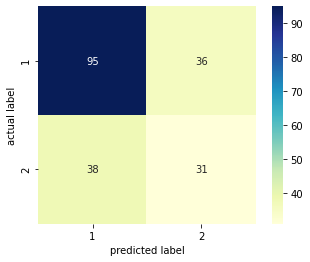

In [97]:
forest_model = gcv.best_estimator_
forest_model.fit(x_train,y_train)
y_train_pred = forest_model.predict(x_train)
y_test_pred = forest_model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

cm = confusion_matrix(y_test, preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');


    Pre Pruning the tree improved the model by 1% only

    post pruning 

In [98]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00083333 0.0009375  0.001      0.00107143 0.00107143
 0.00109375 0.00111842 0.001125   0.00113636 0.00114865 0.00115385
 0.00115385 0.00116667 0.00120625 0.00121094 0.00125322 0.00145833
 0.00149123 0.00166667 0.00166667 0.00166667 0.00166667 0.00166667
 0.00175    0.00175    0.00175347 0.00177778 0.00179584 0.00185307
 0.001875   0.001875   0.001875   0.001875   0.001875   0.00189394
 0.00190132 0.00190132 0.00190476 0.00192855 0.002      0.00208333
 0.00208333 0.00210069 0.00214286 0.0021875  0.0021875  0.0021875
 0.00223776 0.00225    0.00225023 0.00227509 0.00230926 0.00234375
 0.00234578 0.002375   0.00247159 0.00252525 0.0025641  0.00265783
 0.00273674 0.00285036 0.00293872 0.0030625  0.00324675 0.00334169
 0.00346226 0.00354167 0.00356178 0.0036846  0.00389318 0.00396396
 0.0043685  0.00475228 0.00546882 0.00602083 0.0062524  0.00635143
 0.00678833 0.01038337 0.01165043 0.03822687]


In [89]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

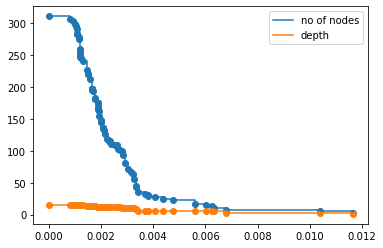

In [90]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()


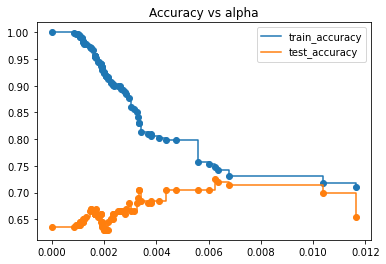

In [91]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()


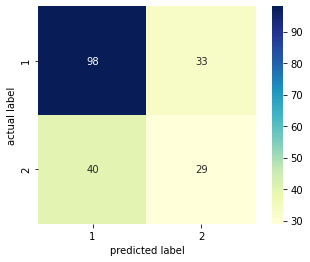

In [95]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)


cm = confusion_matrix(y_test, preds)
target_labels = np.unique(y_test)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",
            xticklabels=target_labels, yticklabels=target_labels)

plt.xlabel('predicted label')
plt.ylabel('actual label');

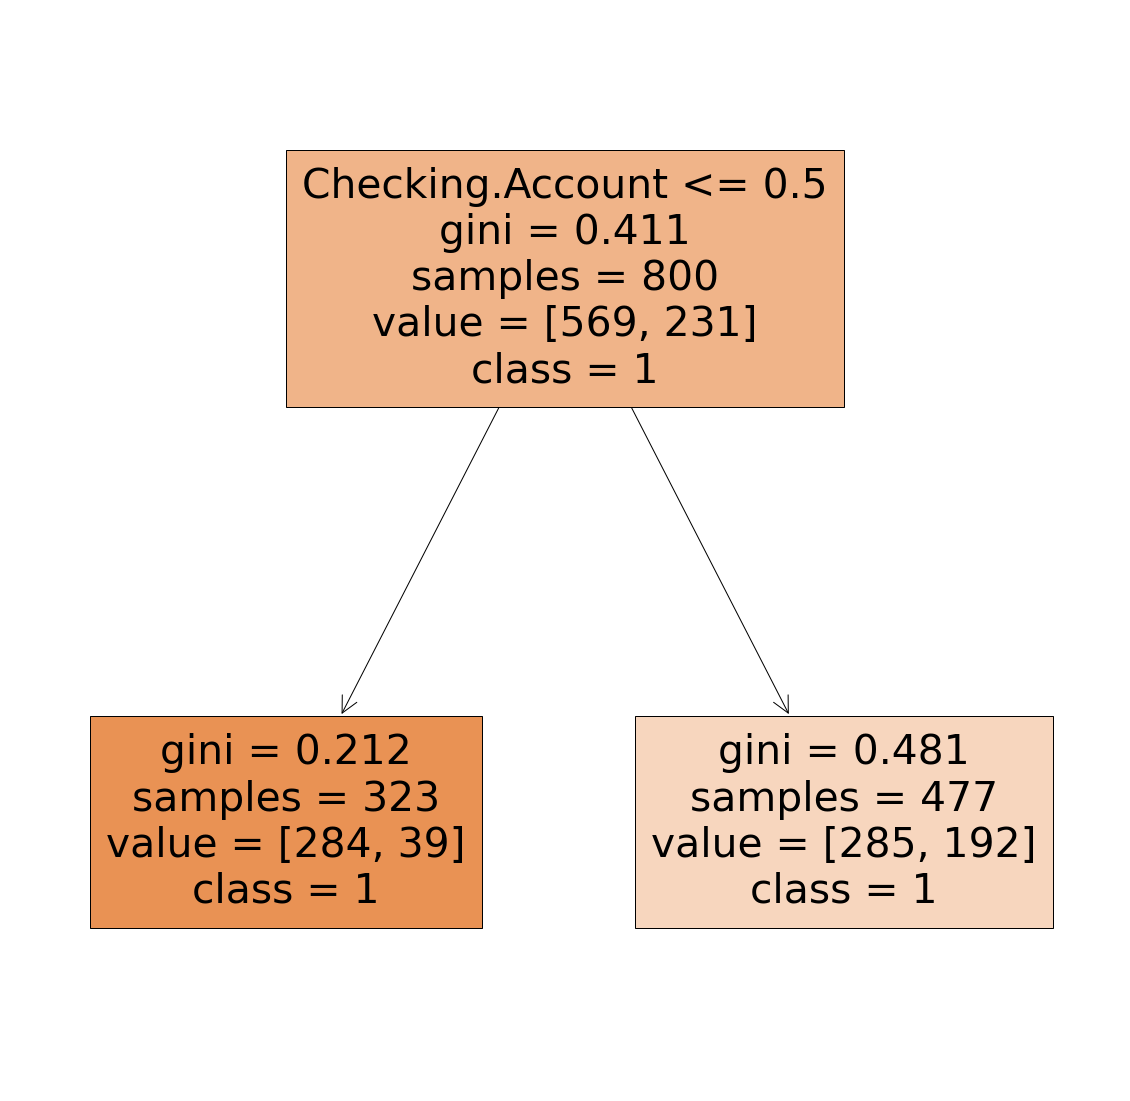

In [98]:
plt.figure(figsize=(20,20))
features = bank1.columns
classes = ['1','2']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

## References

https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial